| __인덱스__ | __변수명__ | __설명__ |
|   :---    |     :---     |       :---      |
| 1 | __hotel__ | 호텔 유형 (리조트 호텔, 시티 호텔) |
| 2 | __is_canceled__ | 예약 취소 상태 (0 = 취소되지 않음, 1 = 취소됨) |
| 3 | __lead_time__ | 예약과 도착 사이의 일수 |
| 4 | __arrival_date_year__ | 도착 연도 |
| 5 | __arrival_date_month__ | 도착 월 |
| 6 | __arrival_date_week_number__ | 도착 주의 주차 |
| 7 | __arrival_date_day_of_month__ | 도착일의 일자 |
| 8 | __stays_in_weekend_nights__ | 주말 밤(토요일과 일요일)에 머무른 또는 예약된 일수 |
| 9 | __stays_in_week_nights__ | 평일 밤에 머무른 또는 예약된 일수 |
| 10 | __adults__ | 성인 수 |
| 11 | __children__ | 어린이 수 |
| 12 | __babies__ | 유아 수 |
| 13 | __meal__ | 예약한 식사 유형 (BB, FB, HB, SC, 정의되지 않음) |
| 14 | __country__ | 고객의 출신 국가 |
| 15 | __market_segment__ | 시장 세그먼트 지정 |
| 16 | __distribution_channel__ | 예약 배급 채널 |
| 17 | __is_repeated_guest__ | 반복 고객 여부 (0 = 반복 아님, 1 = 반복) |
| 18 | __previous_cancellations__ | 고객에 의해 취소된 이전 예약 수 |
| 19 | __previous_bookings_not_canceled__ | 고객에 의해 취소되지 않은 이전 예약 수 |
| 20 | __reserved_room_type__ | 예약한 객실 유형 |
| 21 | __assigned_room_type__ | 할당된 객실 유형 |
| 22 | __booking_changes__ | 예약에 대한 변경 횟수 |
| 23 | __deposit_type__ | 예치금 유형 (No Deposit, Refundable, Non Refund) |
| 24 | __agent__ | 예약을 담당한 여행사 ID |
| 25 | __company__ | 예약을 담당한 회사 ID |
| 26 | __days_in_waiting_list__ | 예약 대기 목록에 있던 일수 |
| 27 | __customer_type__ | 고객 유형 (Transient, Contract, Transient-Party, Group) |
| 28 | __adr__ | 평균 일일 요금 |
| 29 | __required_car_parking_spaces__ | 필요한 주차 공간 수 |
| 30 | __total_of_special_requests__ | 요청된 특별 요청 수 |
| 31 | __reservation_status__ | 마지막 예약 상태 (Check-Out, Canceled, No-Show) |
| 32 | __reservation_status_date__ | 마지막 예약 상태의 날짜 |
| 33 | __name__ | 고객의 이름 |
| 34 | __email__ | 고객의 이메일 주소 |
| 35 | __phone-number__ | 고객의 전화번호 |
| 36 | __credit_card__ | 고객의 신용카드 마지막 네 자리 번호 |


In [93]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [94]:
df=pd.read_csv('hotel_booking.csv')

In [95]:
##결측치를 보면

df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [96]:
#개인 정보는 제거하고 학습할 컬럼 추출

df=df.drop(columns = ['name','email','phone-number','credit_card'])

In [97]:
## 결측값 대치

df.agent.value_counts()

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: count, Length: 333, dtype: int64

In [98]:
df.company.value_counts()

company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: count, Length: 352, dtype: int64

In [99]:
#결측치 대치
df['children'].fillna(0, inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['agent'].fillna('No agent', inplace=True)
df['company'].fillna('No company', inplace=True)

C:\Users\bykim\AppData\Local\Temp\ipykernel_22740\2863126761.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)
C:\Users\bykim\AppData\Local\Temp\ipykernel_22740\2863126761.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when

In [100]:
# agent, company 문자열로 변환
df['agent'] = df['agent'].astype(str)
df['company'] = df['company'].astype(str)

In [101]:
#범주형 데이터 인코딩
label_encoders = {}
for columns in df.select_dtypes(include = ['object']).columns:
    le = LabelEncoder()
    df[columns] = le.fit_transform(df[columns])
    label_encoders[columns] = le
    


In [102]:
# 타겟과 피처를 분리
X = df.drop(columns = ['is_canceled'])
y = df['is_canceled']

In [103]:
df_sp =df.drop(columns=['is_canceled','reservation_status','reservation_status_date','arrival_date_year'])

In [104]:
# 타겟과 피처를 분리
X = df_sp
y = df['is_canceled']

In [105]:
# train_test_split
# RandomForest

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

In [106]:
## 정답 데이터셋과 유사한 피처를 제거한 후 성능평가
## 랜덤포레스트 모델 학습

rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train, y_train)

#예측 성능 평가 
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)
rc =recall_score(y_test, y_pred) 
print(acc)
print(f1)
print(rc)

0.8915598738029428
0.8471949012510819
0.8120521909646278


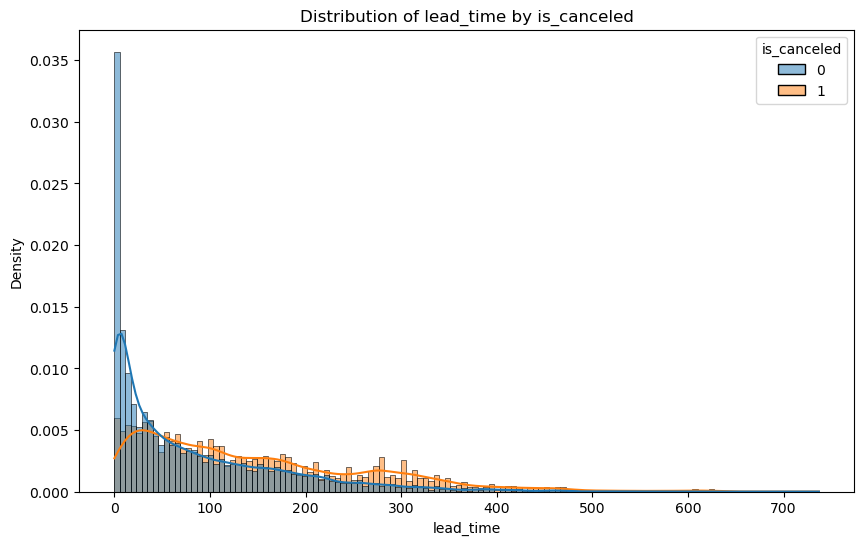

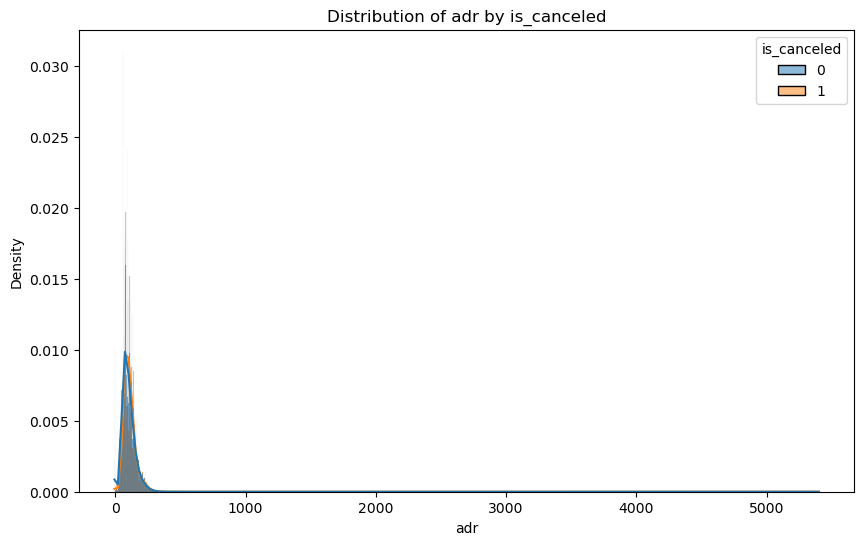

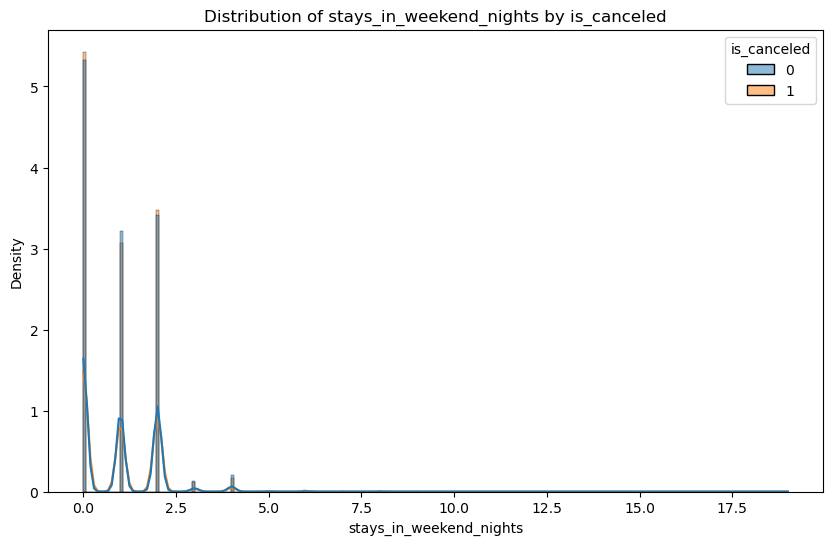

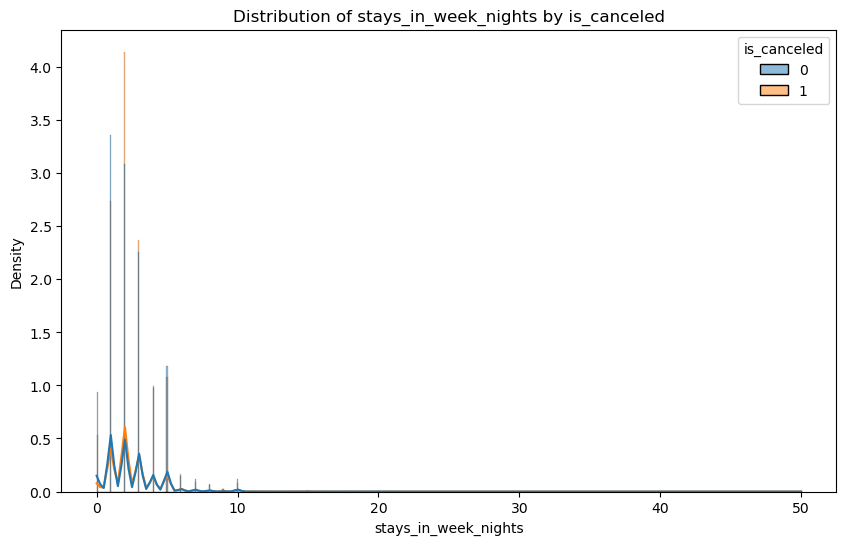

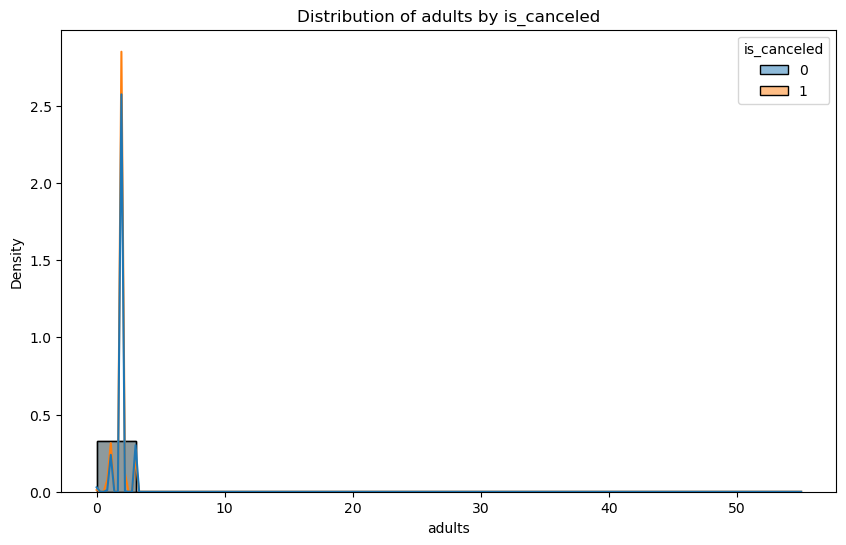

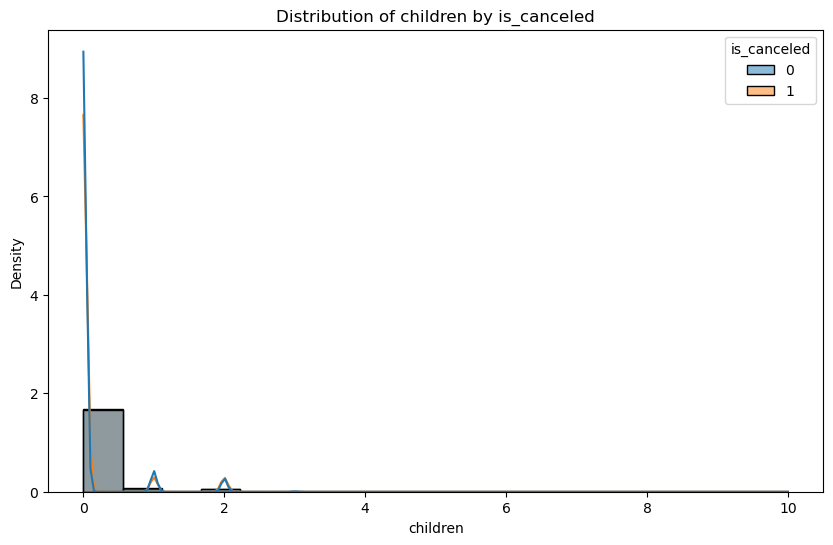

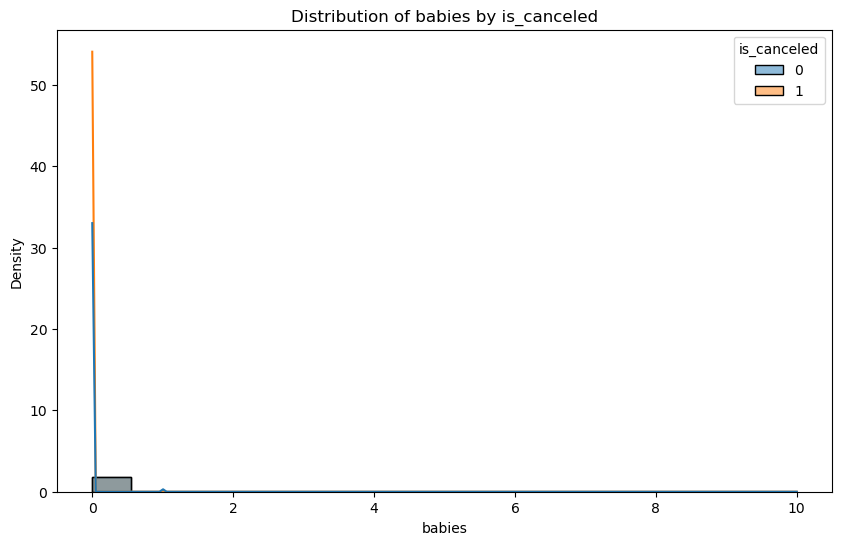

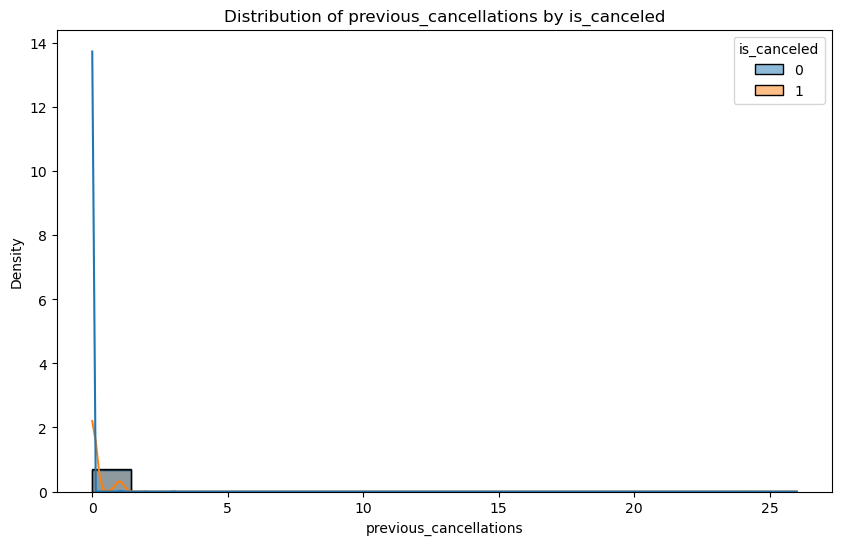

In [107]:
## y값에 따른 피처의 분포 시각화
def plot_f_dist(df, feature, target='is_canceled'):
    plt.figure(figsize=(10,6))
    sns.histplot(data = df, x = feature, hue=target, kde= True, stat='density',common_norm=False)
    plt.title(f'Distribution of {feature} by {target}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.show()
    
# 피처에 대한 시각화

fe = ['lead_time','adr','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','previous_cancellations']

for feature in fe:
    plot_f_dist(df,feature)

In [108]:
df_sp

,hotel,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,342,5,27,1,0,0,2,0.0,0,...,2,3,0,333,352,0,2,0.00,0,0
1,1,737,5,27,1,0,0,2,0.0,0,...,2,4,0,333,352,0,2,0.00,0,0
2,1,7,5,27,1,0,1,1,0.0,0,...,2,0,0,333,352,0,2,75.00,0,0
3,1,13,5,27,1,0,1,1,0.0,0,...,0,0,0,156,352,0,2,75.00,0,0
4,1,14,5,27,1,0,2,2,0.0,0,...,0,0,0,102,352,0,2,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,23,1,35,30,2,5,2,0.0,0,...,0,0,0,216,352,0,2,96.14,0,0
119386,0,102,1,35,31,2,5,3,0.0,0,...,4,0,0,323,352,0,2,225.43,0,2
119387,0,34,1,35,31,2,5,2,0.0,0,...,3,0,0,323,352,0,2,157.71,0,4
119388,0,109,1,35,31,2,5,2,0.0,0,...,0,0,0,322,352,0,2,104.40,0,0


In [109]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  int32  
 3   arrival_date_week_number        119390 non-null  int64  
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   adults                          119390 non-null  int64  
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  int64  
 10  meal                            119390 non-null  int32  
 11  country                         119390 non-null  int32  
 12  market_segment  

## 혼자 예약한 손님의 분포

In [110]:
df_alone = df.query('adults == 1 & children < 1 & babies < 1')
df_alone

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,1,0,7,2015,5,27,1,0,1,1,...,0,333,352,0,2,75.00,0,0,1,122
3,1,0,13,2015,5,27,1,0,1,1,...,0,156,352,0,2,75.00,0,0,1,122
20,1,0,37,2015,5,27,1,1,4,1,...,0,103,352,0,2,97.29,0,1,1,126
30,1,0,118,2015,5,27,1,4,10,1,...,0,333,352,0,2,62.00,0,2,1,135
77,1,0,2,2015,5,27,3,2,2,1,...,0,102,352,0,2,122.00,0,0,1,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119357,0,0,47,2017,1,35,31,1,3,1,...,0,233,352,0,2,91.02,0,0,1,917
119365,0,0,54,2017,1,35,27,3,5,1,...,0,30,352,0,2,266.75,0,1,1,917
119370,0,0,201,2017,1,35,30,1,4,1,...,0,323,352,0,2,108.00,0,2,1,917
119372,0,0,175,2017,1,35,31,1,3,1,...,0,231,352,0,2,82.35,0,1,1,917


<Axes: xlabel='hotel', ylabel='Density'>

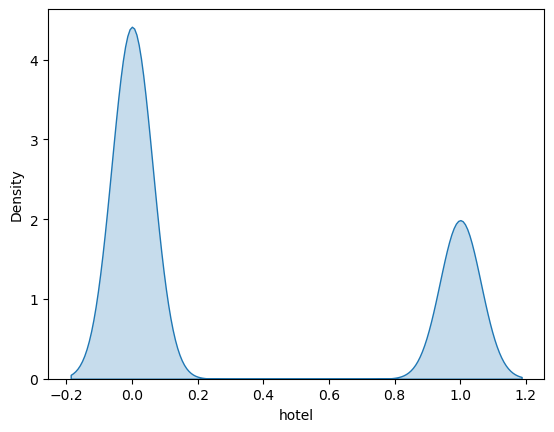

In [111]:
sns.kdeplot(df_alone['hotel'], fill = True)

<Axes: xlabel='is_canceled', ylabel='Density'>

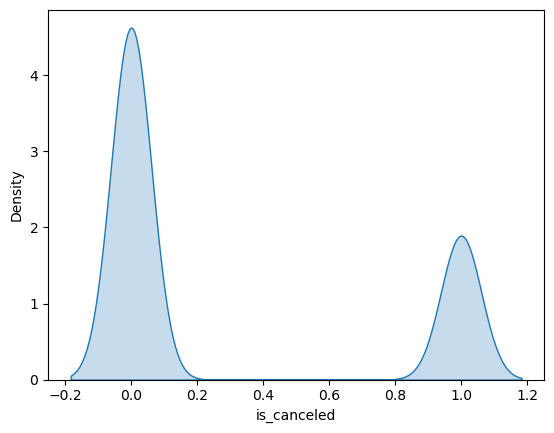

In [112]:
sns.kdeplot(df_alone['is_canceled'], fill = True)

In [113]:
df['is_alone'] = np.where((df['adults'] == 1) & (df['children'] < 1) & (df['babies'] < 1), 1, 0)
df['with_desc'] = np.where((df['children'] > 1) | (df['babies'] > 1), 1, 0)

In [114]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_alone,with_desc
0,1,0,342,2015,5,27,1,0,0,2,...,352,0,2,0.00,0,0,1,121,0,0
1,1,0,737,2015,5,27,1,0,0,2,...,352,0,2,0.00,0,0,1,121,0,0
2,1,0,7,2015,5,27,1,0,1,1,...,352,0,2,75.00,0,0,1,122,1,0
3,1,0,13,2015,5,27,1,0,1,1,...,352,0,2,75.00,0,0,1,122,1,0
4,1,0,14,2015,5,27,1,0,2,2,...,352,0,2,98.00,0,1,1,123,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,0,0,23,2017,1,35,30,2,5,2,...,352,0,2,96.14,0,0,1,919,0,0
119386,0,0,102,2017,1,35,31,2,5,3,...,352,0,2,225.43,0,2,1,920,0,0
119387,0,0,34,2017,1,35,31,2,5,2,...,352,0,2,157.71,0,4,1,920,0,0
119388,0,0,109,2017,1,35,31,2,5,2,...,352,0,2,104.40,0,0,1,920,0,0


## 자손이 있는 경우와 어른 혼자인 경우의 컬럼을 추가 및 테스트

In [115]:
# 타겟과 피처를 분리
df_sp =df.drop(columns=['is_canceled','reservation_status','reservation_status_date','arrival_date_year', 'adults', 'children', 'babies', 'is_alone'])

X = df_sp
y = df['is_canceled']

# train_test_split
# RandomForest

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

## 정답 데이터셋과 유사한 피처를 제거한 후 성능평가
## 랜덤포레스트 모델 학습

rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train, y_train)

#예측 성능 평가 
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)
rc =recall_score(y_test, y_pred) 
print(acc)
print(f1)
print(rc)

0.8906664433090432
0.8461417570328461
0.8121276114337431


recall 점수만 미미한 상승, 나머진 조금 하락함.

In [116]:
df_c = df[df['is_canceled'] == 1]

In [117]:
df_grp = df.groupby('is_canceled')['lead_time'].mean()
df_grp

is_canceled
0     79.984687
1    144.848815
Name: lead_time, dtype: float64

In [118]:
df.corr()['is_canceled'].abs().sort_values(ascending = False).to_frame()

,is_canceled
is_canceled,1.000000
reservation_status,0.917196
deposit_type,0.468634
lead_time,0.293123
country,0.264738
total_of_special_requests,0.234658
required_car_parking_spaces,0.195498
assigned_room_type,0.176028
distribution_channel,0.167600
reservation_status_date,0.162135


In [119]:
df['deposit_type'].unique()

array([0, 2, 1])

<Axes: xlabel='deposit_type', ylabel='Count'>

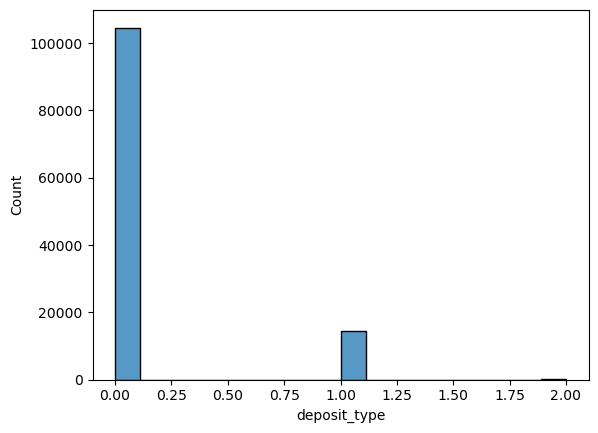

In [120]:
sns.histplot(df['deposit_type'])

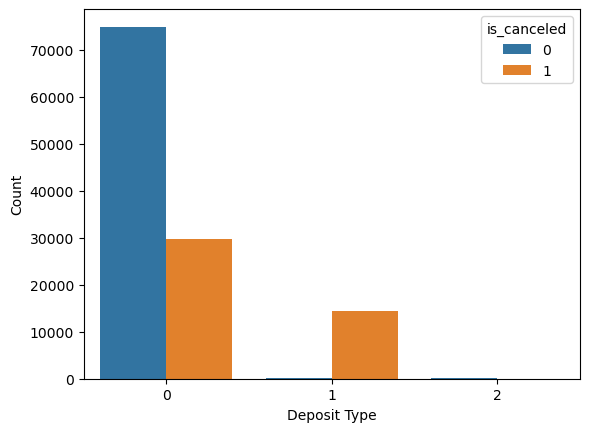

In [121]:
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.show()


In [122]:
df[df['deposit_type'] == 2]['is_canceled'].value_counts()

is_canceled
0    126
1     36
Name: count, dtype: int64

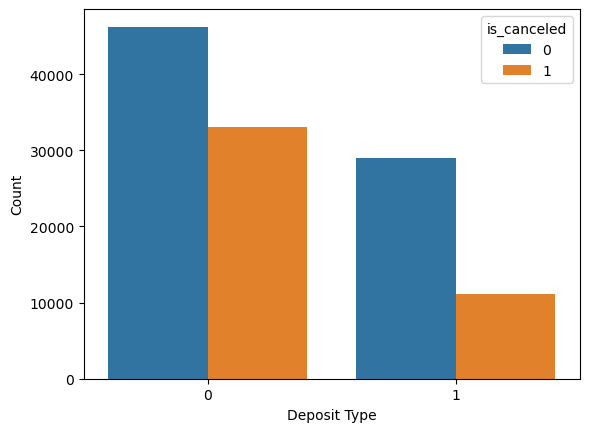

In [123]:
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.show()


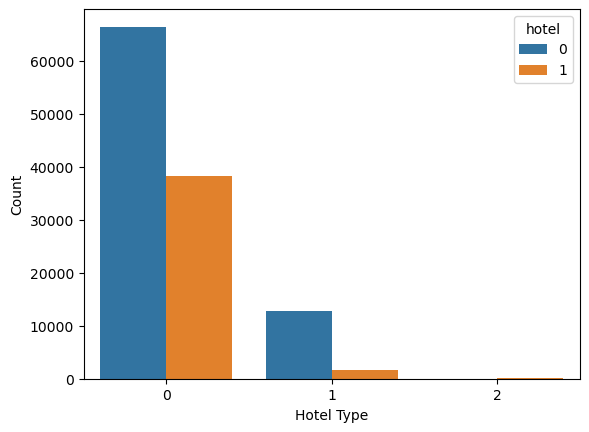

In [124]:
sns.countplot(data=df, x='deposit_type', hue='hotel')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()


In [125]:
df_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  int32  
 3   arrival_date_week_number        119390 non-null  int64  
 4   arrival_date_day_of_month       119390 non-null  int64  
 5   stays_in_weekend_nights         119390 non-null  int64  
 6   stays_in_week_nights            119390 non-null  int64  
 7   meal                            119390 non-null  int32  
 8   country                         119390 non-null  int32  
 9   market_segment                  119390 non-null  int32  
 10  distribution_channel            119390 non-null  int32  
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

In [126]:
# 타겟과 피처를 분리
df_sp =df.drop(columns=['meal','is_canceled','reservation_status','reservation_status_date','arrival_date_year', 'adults', 'children', 'babies', 'is_alone'])

X = df_sp
y = df['is_canceled']

# train_test_split
# RandomForest

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

## 정답 데이터셋과 유사한 피처를 제거한 후 성능평가
## 랜덤포레스트 모델 학습

rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train, y_train)

#예측 성능 평가 
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)
rc =recall_score(y_test, y_pred) 
print(acc)
print(f1)
print(rc)

0.8911689979618617
0.8467887744674161
0.8124292933102044


In [127]:
df_c = df[df['is_canceled'] == 1]
df_nc = df[df['is_canceled'] == 0]
df_c

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,is_alone,with_desc
8,1,1,85,2015,5,27,1,0,3,2,...,352,0,2,82.0,0,1,0,72,0,0
9,1,1,75,2015,5,27,1,0,3,2,...,352,0,2,105.5,0,0,0,61,0,0
10,1,1,23,2015,5,27,1,0,4,2,...,352,0,2,123.0,0,0,0,114,0,0
27,1,1,60,2015,5,27,1,2,5,2,...,352,0,2,107.0,0,2,0,76,0,0
32,1,1,96,2015,5,27,1,2,8,2,...,352,0,2,108.3,0,2,0,92,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110280,0,1,132,2017,0,17,25,0,0,0,...,352,0,2,0.0,0,3,0,785,0,0
111355,0,1,4,2017,6,23,5,1,0,1,...,90,0,2,65.0,0,0,0,826,1,0
111924,0,1,7,2017,8,22,31,0,1,1,...,90,0,2,65.0,0,0,0,821,1,0
111925,0,1,6,2017,5,29,17,1,0,1,...,90,0,2,65.0,0,0,2,868,1,0


<Axes: >

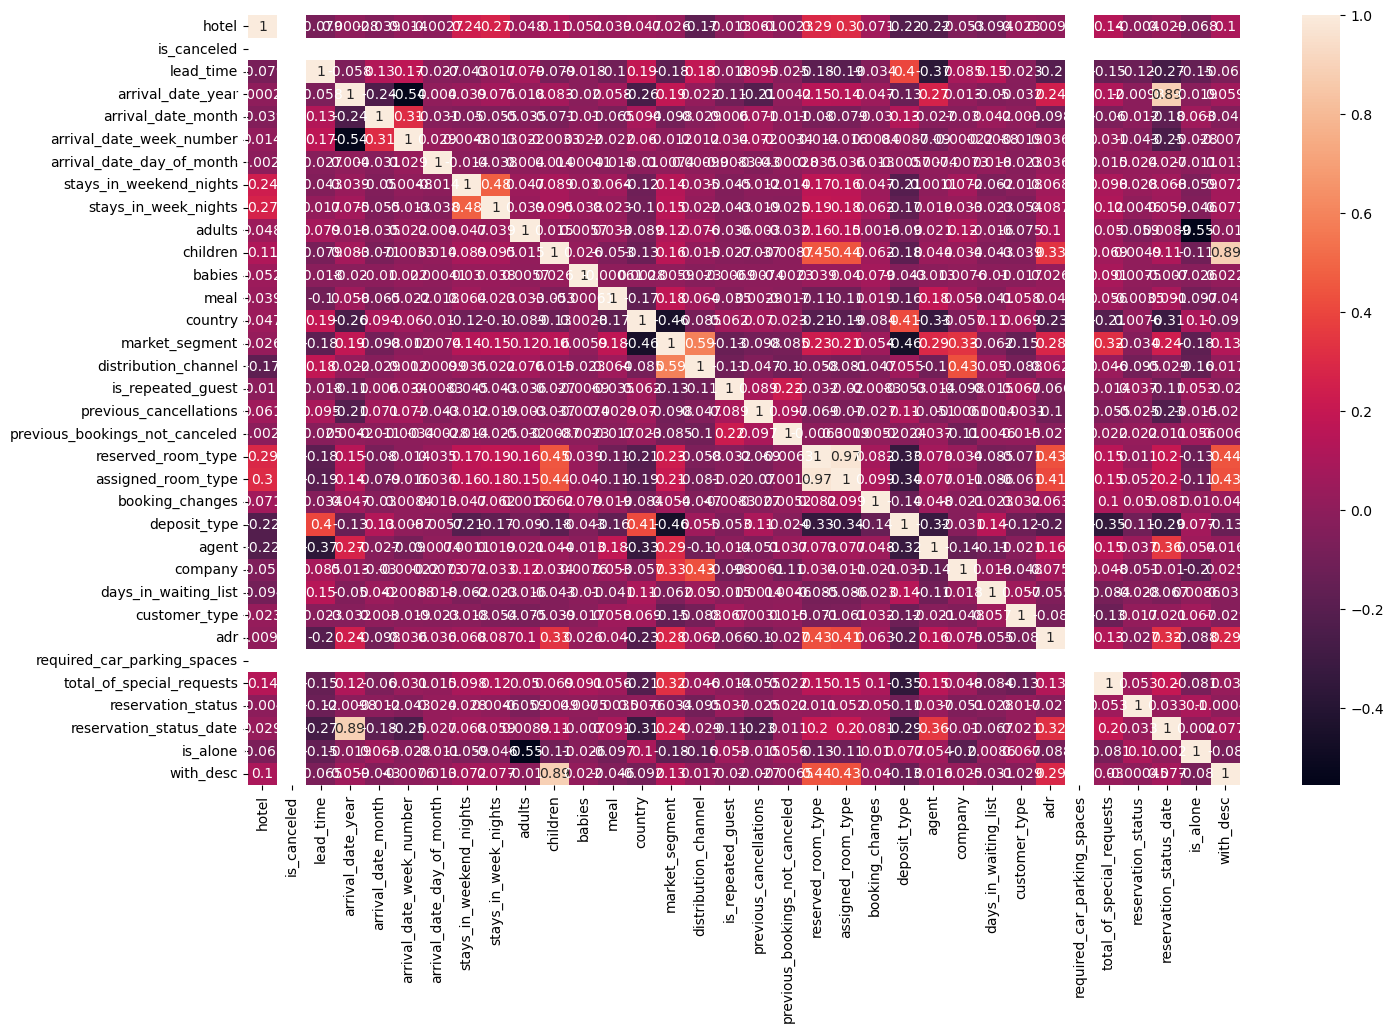

In [128]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_c.corr(), annot = True)

hotel


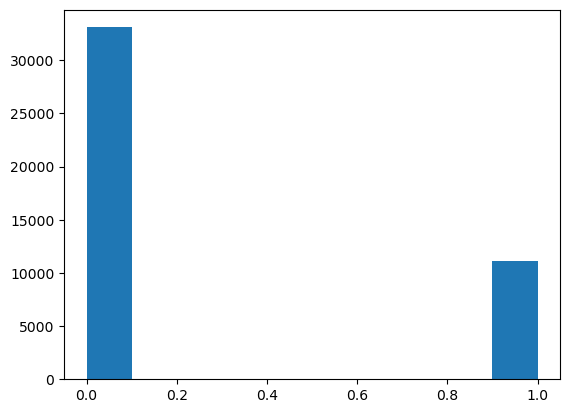

is_canceled


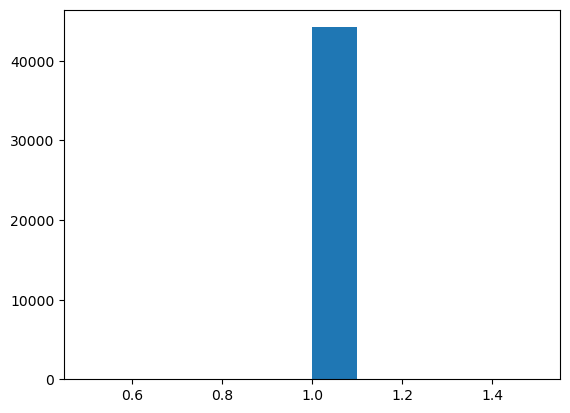

lead_time


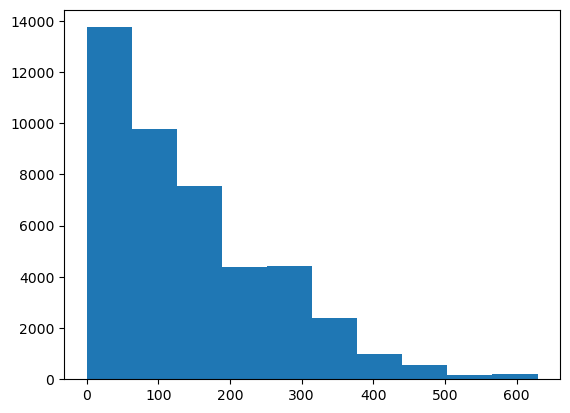

arrival_date_year


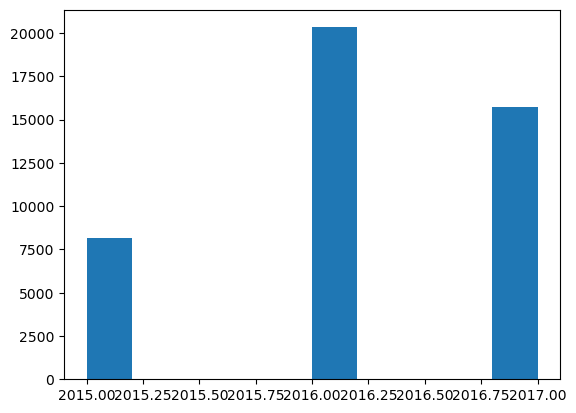

arrival_date_month


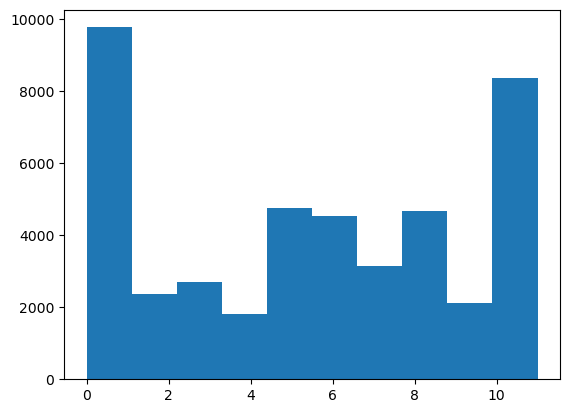

arrival_date_week_number


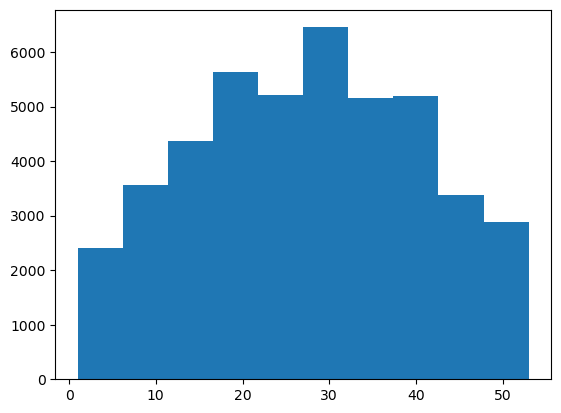

arrival_date_day_of_month


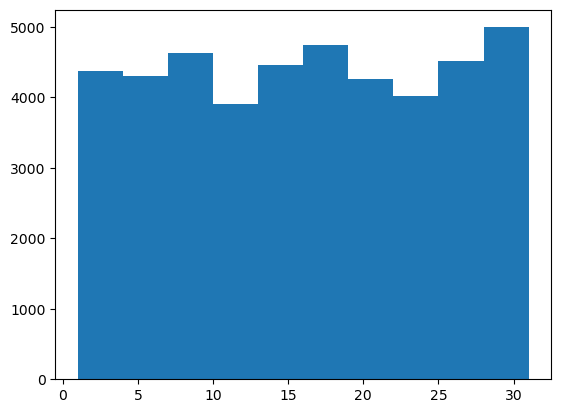

stays_in_weekend_nights


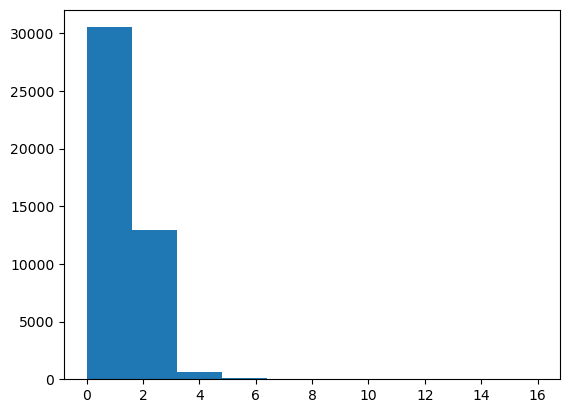

stays_in_week_nights


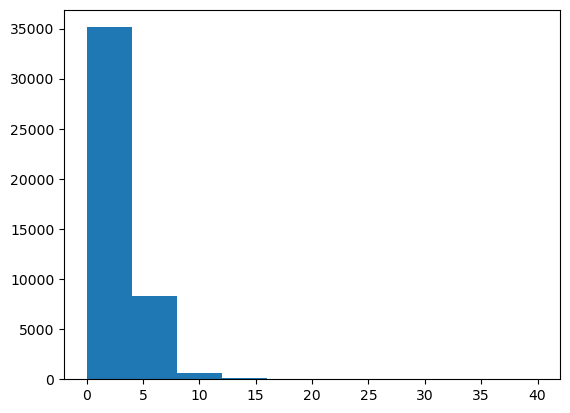

adults


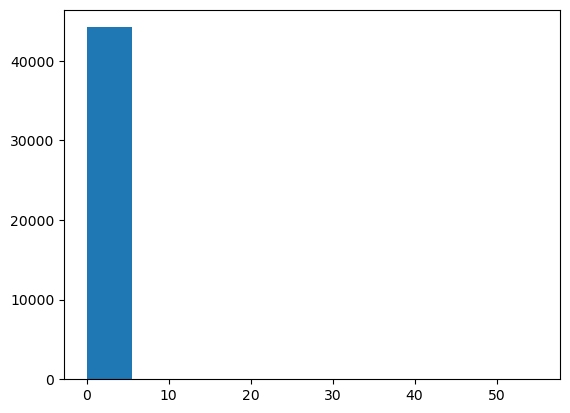

children


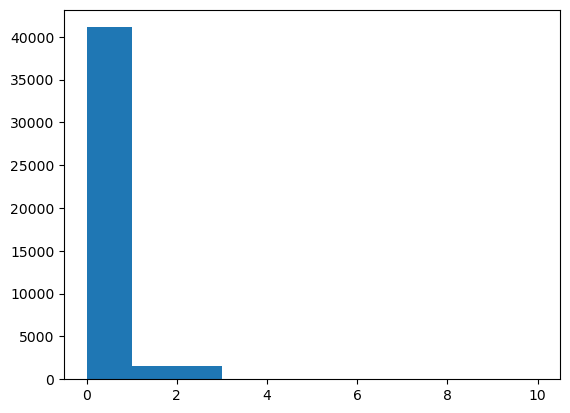

babies


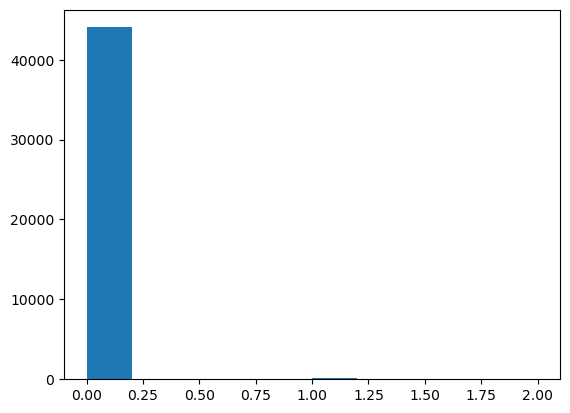

meal


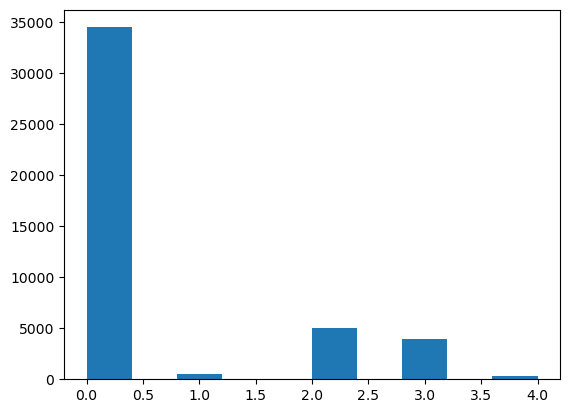

country


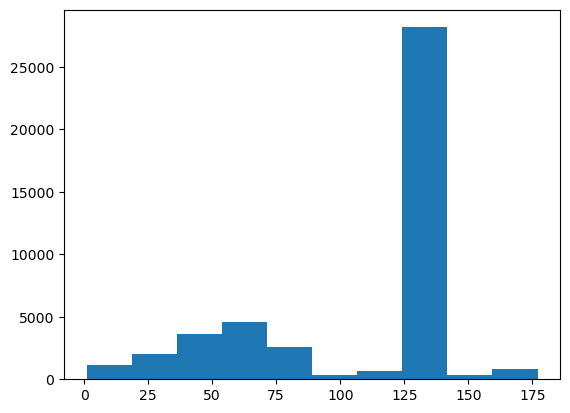

market_segment


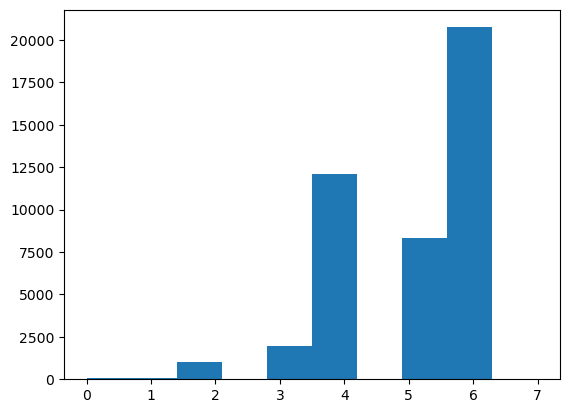

distribution_channel


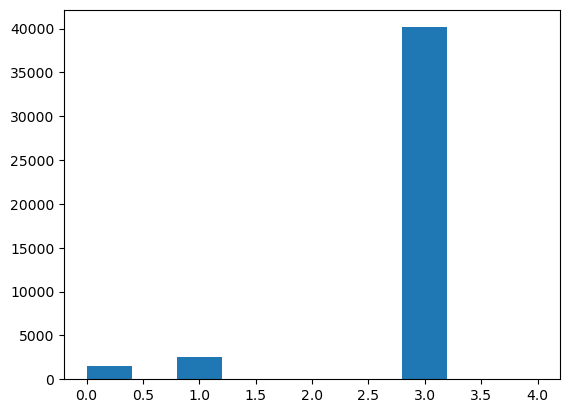

is_repeated_guest


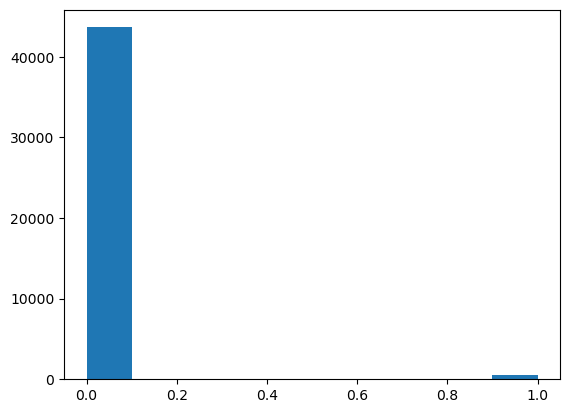

previous_cancellations


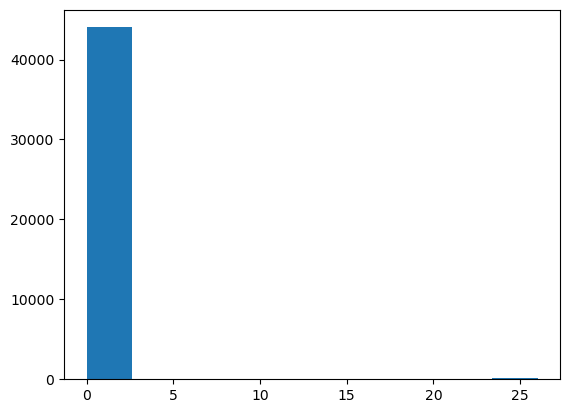

previous_bookings_not_canceled


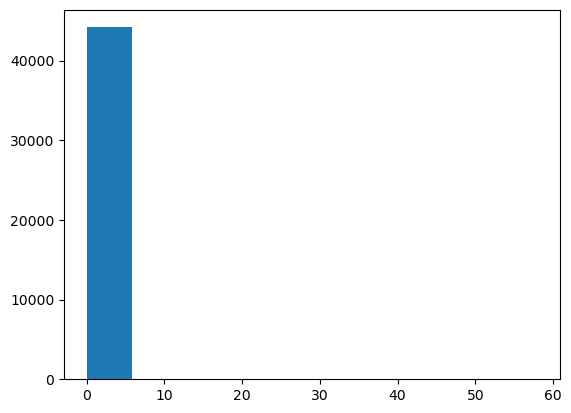

reserved_room_type


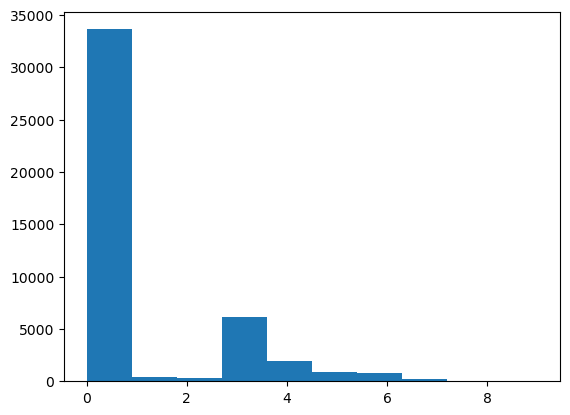

assigned_room_type


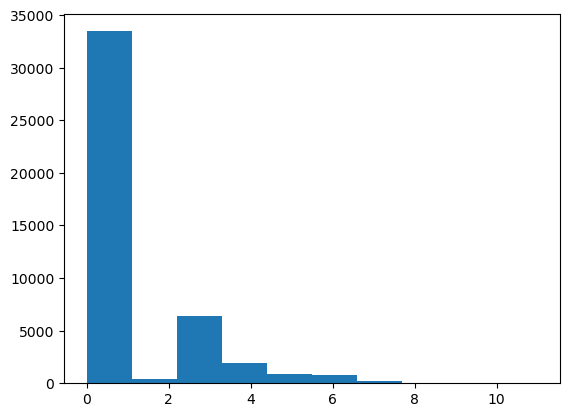

booking_changes


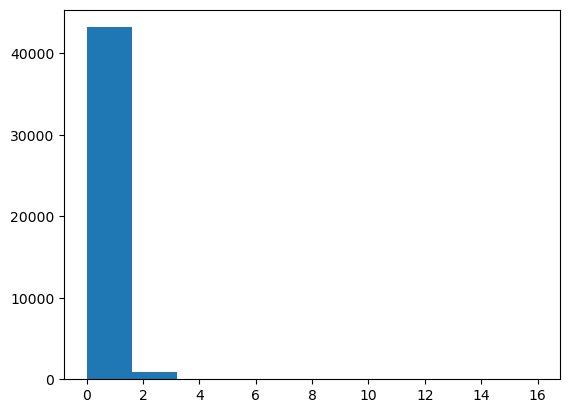

deposit_type


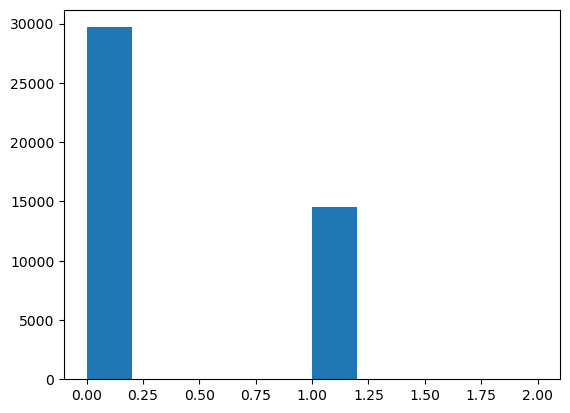

agent


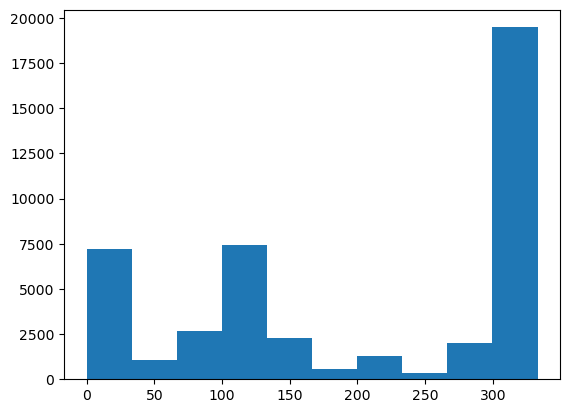

company


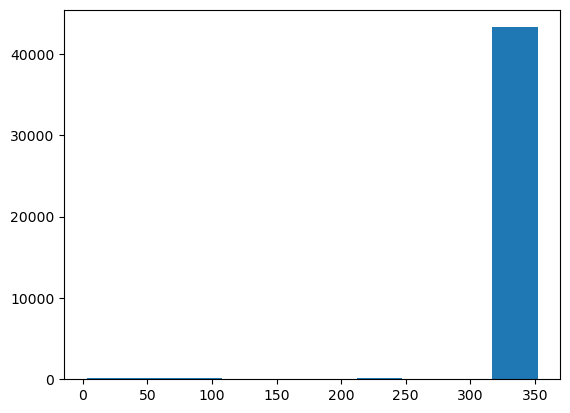

days_in_waiting_list


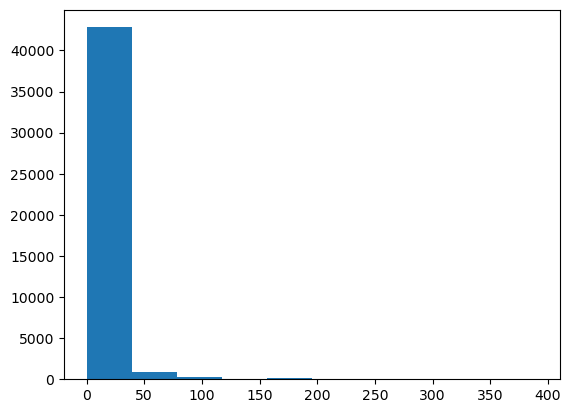

customer_type


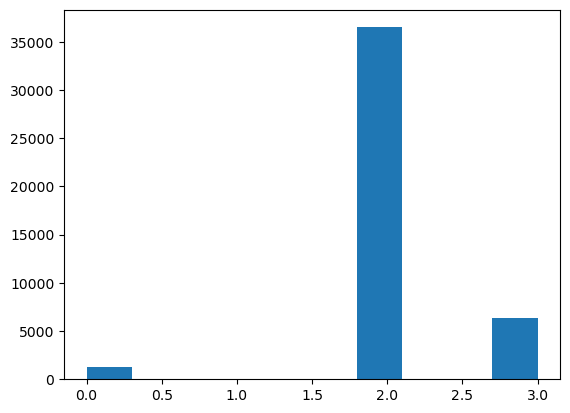

adr


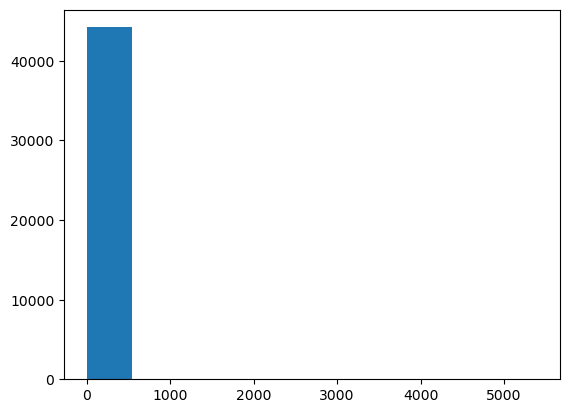

required_car_parking_spaces


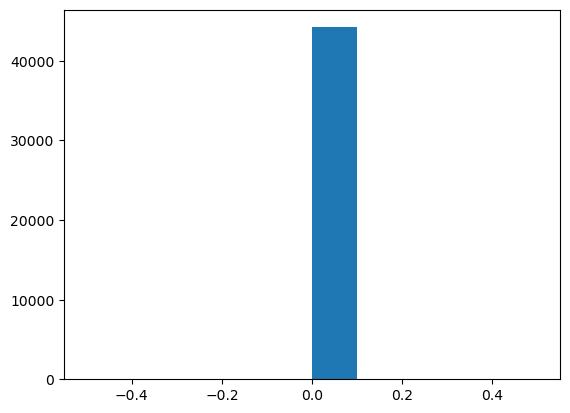

total_of_special_requests


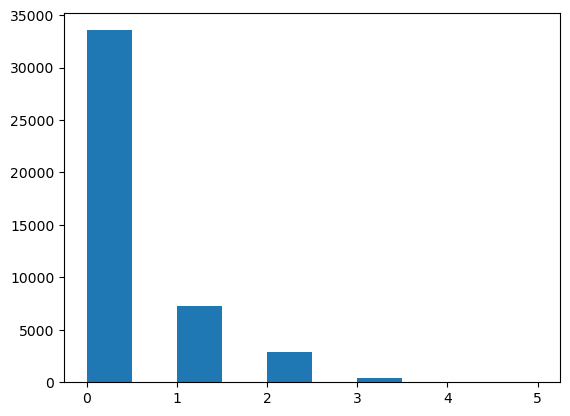

reservation_status


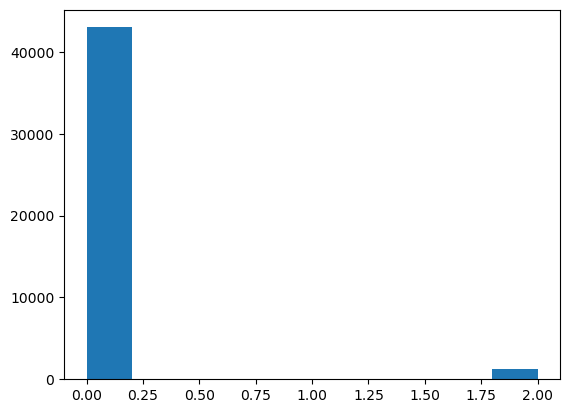

reservation_status_date


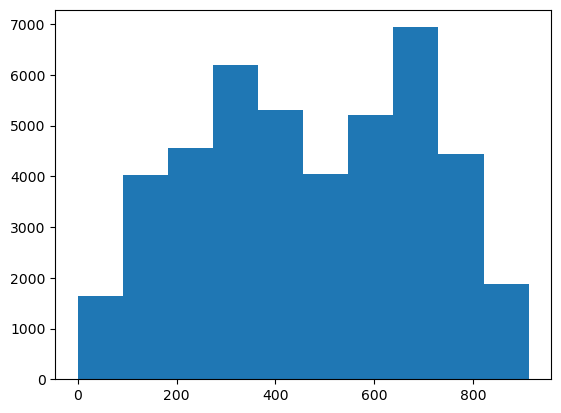

is_alone


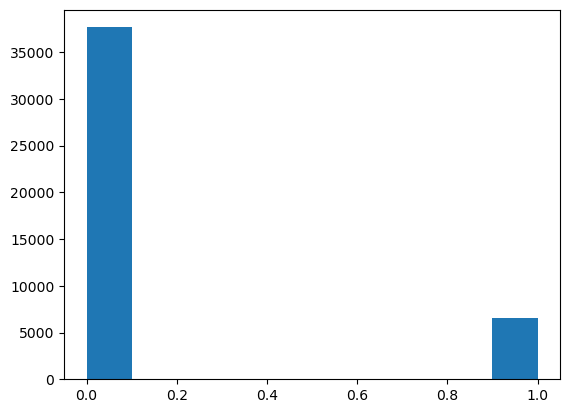

with_desc


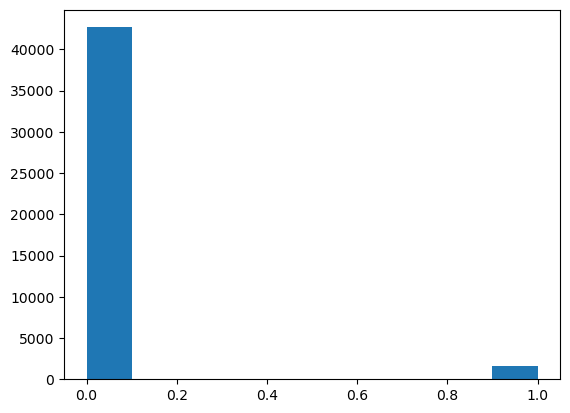

In [129]:
for c in df_c.columns:
    plt.hist(df_c[c])
    print(c)
    plt.show()

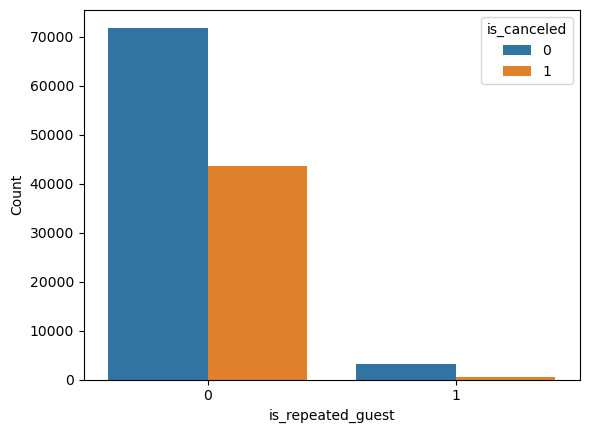

In [130]:
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
plt.xlabel('is_repeated_guest')
plt.ylabel('Count')
plt.show()


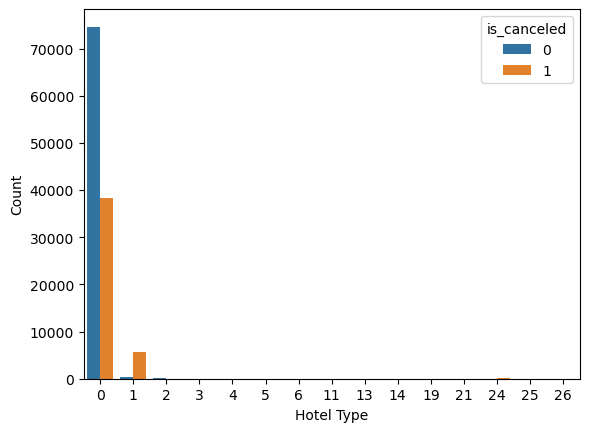

In [131]:
sns.countplot(data=df, x='previous_cancellations', hue='is_canceled')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

In [132]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'is_alone',
       'with_desc'],
      dtype='object')

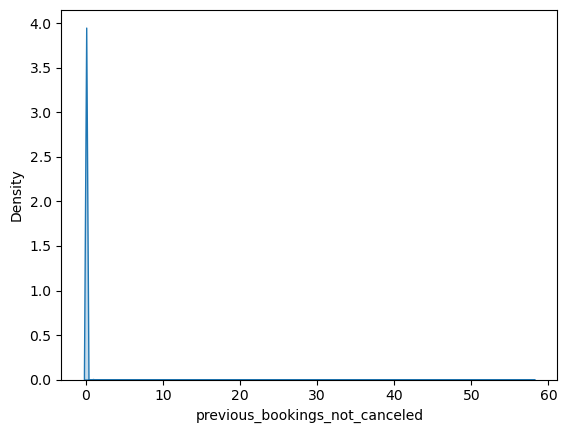

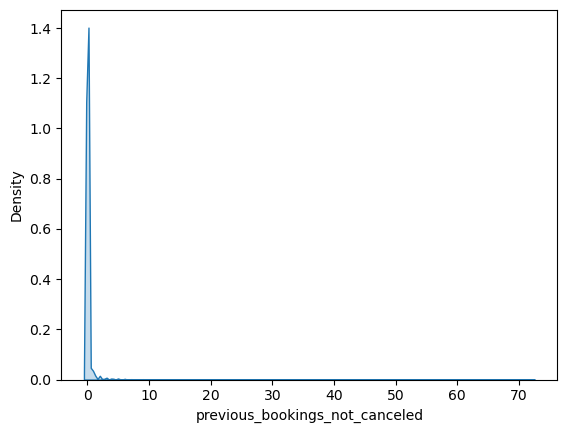

In [133]:
sns.kdeplot(df_c['previous_bookings_not_canceled'], fill = True)
plt.show()
sns.kdeplot(df_nc['previous_bookings_not_canceled'], fill = True)
plt.show()

In [134]:
df.previous_bookings_not_canceled.value_counts()

previous_bookings_not_canceled
0     115770
1       1542
2        580
3        333
4        229
       ...  
47         1
49         1
50         1
51         1
72         1
Name: count, Length: 73, dtype: int64

In [135]:
df_nc.previous_cancellations.value_counts()

previous_cancellations
0     74624
1       337
2        78
3        45
11       25
4        24
5        17
6        15
13        1
Name: count, dtype: int64

In [136]:
df_c.previous_cancellations.value_counts()

previous_cancellations
0     38282
1      5714
24       48
2        38
26       26
25       25
3        20
19       19
14       14
13       11
11       10
4         7
6         7
5         2
21        1
Name: count, dtype: int64

## 충성 고객과 그렇지 않은 고객을 나타낼 것으로 추측되는 새로운 컬럼 추가(is_unloyal)
- 반복 고객이 아니면서 이전 취소 수가 1 이상이며, 취소되지 않은 이전 예약 수가 1보다 작은 고객

In [141]:
df_test = df.assign(is_unloyal = np.where((df['is_repeated_guest'] != 1) & (df['previous_cancellations'] >= 1) & (df['previous_bookings_not_canceled'] < 1), 1, 0))

In [142]:
# 타겟과 피처를 분리
df_sp =df_test.drop(columns=['meal','is_canceled','reservation_status','reservation_status_date','arrival_date_year', 'adults', 'children', 'babies', 'is_alone'])

X = df_sp
y = df_test['is_canceled']

# train_test_split
# RandomForest

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

## 정답 데이터셋과 유사한 피처를 제거한 후 성능평가
## 랜덤포레스트 모델 학습

rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train, y_train)

#예측 성능 평가 
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)
rc =recall_score(y_test, y_pred) 
print(acc)
print(f1)
print(rc)

0.8917273920205488
0.8475149418055993
0.8128063956557809


In [173]:
## 'reservation_status_date','arrival_date_year'피쳐를 추가로 사용한 경우

In [174]:
cor = df_test.corr()['is_canceled'].abs().sort_values(ascending = False).to_frame()
cor[cor['is_canceled'] < 0.005]

,is_canceled
stays_in_weekend_nights,0.001791
arrival_date_month,0.001491


In [175]:
df_test['adr_bin'] = pd.qcut(df_test['adr'], 30, labels = range(1, 31))

In [172]:
# 타겟과 피처를 분리
df_sp =df_test.drop(columns=['adr','meal','is_canceled','reservation_status', 'adults', 'children', 'babies', 'is_alone'])

X = df_sp
y = df_test['is_canceled']

# train_test_split
# RandomForest

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=111)

## 정답 데이터셋과 유사한 피처를 제거한 후 성능평가
## 랜덤포레스트 모델 학습

rf_model = RandomForestClassifier(random_state=111)
rf_model.fit(X_train, y_train)

#예측 성능 평가 
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
f1 =f1_score(y_test, y_pred)
rc =recall_score(y_test, y_pred) 
print(acc)
print(f1)
print(rc)

0.945752017198537
0.9238367762925797
0.8887548080549061


# 최종 acc, f1, recall
### ['reservation_status','reservation_status_date','arrival_date_year'] 피쳐를 제거한 경우
- acc
    - 0.8917273920205488 > 0.8915598738029428(기준)
- f1
    - 0.8475149418055993 > 0.8471949012510819(기준)
- recall
    - 0.8128063956557809 > 0.8120521909646278(기준)
### ['reservation_status']만 제거하고 adr을 비닝한 경우
- acc
    - 0.945752017198537 > 0.8915598738029428(기준)
- f1
    - 0.9238367762925797 > 0.8471949012510819(기준)
- recall
    - 0.8887548080549061 > 0.8120521909646278(기준)